In [7]:
import numpy as np
import cv2
import mediapipe as mp
import os
import time
import matplotlib.pyplot as plt

mp_holistic = mp.solutions.holistic # holistic moderl- make detection
mp_drawing = mp.solutions.drawing_utils # for draw them

In [8]:
# Define green color drawing specs for landmarks and connections
landmark_drawing_spec = mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=1, circle_radius=2)
connection_drawing_spec = mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=1, circle_radius=2)

def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec,
            connection_drawing_spec
        )
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec,
            connection_drawing_spec
        )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec,
            connection_drawing_spec
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            landmark_drawing_spec,
            connection_drawing_spec
        )

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion BGR2RGB
    image.flags.writeable= False                   # Image is no longer writerble
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is no writable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion RGB2BGR
    return image, results


In [11]:
#cv2.cvtColor??
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)  # FACEMESH_CONTOURS line na Simplified face outline
 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [22]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),  
                             mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
                             )  
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=3),  
                             mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
                             )
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=3),  
                             mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=3),  # Added comma here
                             mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
                             )

In [13]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_

In [23]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [14]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Optional[
        Union[DrawingSpec, Mapping[int, DrawingSpec]]
    ] = DrawingSpec(color=RED_

In [24]:
cap = cv2.VideoCapture(0)
#set media pipeline model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    
    while cap.isOpened():
        ret,frame = cap.read()
        # make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw Landmarks
        #draw_landmarks(image, results)
        draw_styled_landmarks(image, results)
        cv2.imshow('Action Detection', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [16]:
len(results.face_landmarks.landmark) #results.left_hand_landmarks.landmark

468

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
frame

array([[[228, 235, 231],
        [228, 235, 231],
        [227, 235, 231],
        ...,
        [210, 217, 216],
        [211, 217, 216],
        [211, 217, 216]],

       [[228, 235, 232],
        [227, 235, 232],
        [226, 235, 232],
        ...,
        [210, 217, 216],
        [211, 217, 216],
        [211, 217, 216]],

       [[226, 233, 232],
        [226, 234, 233],
        [225, 235, 233],
        ...,
        [211, 218, 217],
        [212, 218, 217],
        [212, 218, 217]],

       ...,

       [[181, 187, 190],
        [181, 187, 190],
        [180, 187, 190],
        ...,
        [150, 156, 158],
        [152, 157, 159],
        [152, 157, 158]],

       [[181, 186, 189],
        [180, 186, 189],
        [179, 186, 189],
        ...,
        [150, 156, 158],
        [152, 157, 159],
        [153, 158, 159]],

       [[181, 186, 189],
        [180, 186, 189],
        [179, 186, 189],
        ...,
        [150, 156, 158],
        [151, 157, 159],
        [153, 158, 159]]

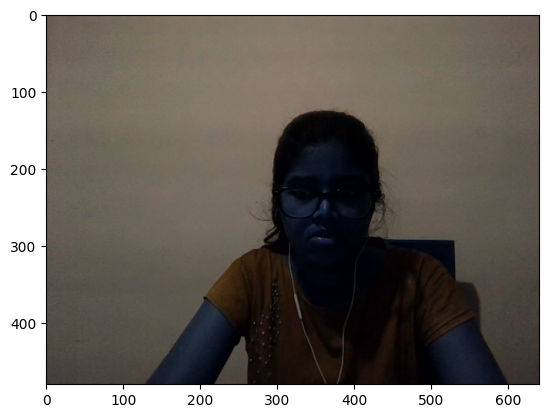

In [16]:
plt.imshow(frame) 

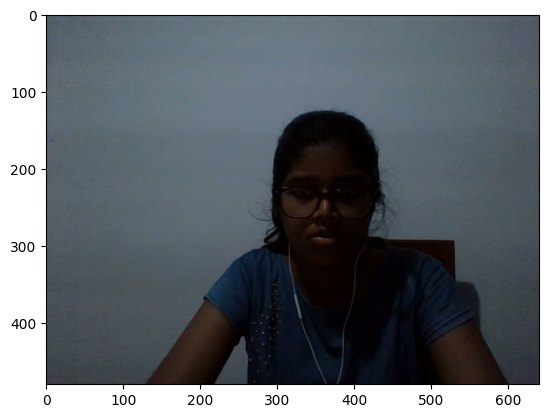

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [19]:
results

NameError: name 'results' is not defined

In [18]:
draw_landmarks(frame,results)

NameError: name 'results' is not defined

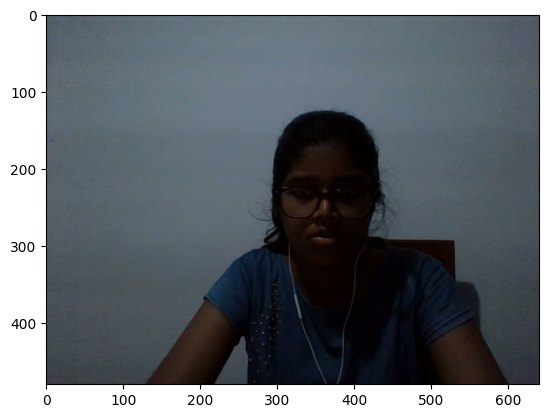

In [20]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [31]:
results.pose_landmarks.landmark[0]

x: 0.443634808
y: 0.391770184
z: -0.851711631
visibility: 0.999861777

In [35]:
results.pose_landmarks.landmark[0].visibility

0.9998617768287659

In [236]:
pose = []
for res in results.pose_landmarks.landmark:
    test= np.array([res.x,res.y, res.z,res.visibility])
    pose.append(test)

In [237]:
test

array([ 5.03073752e-01,  2.43472838e+00, -5.03163517e-01,  1.27244112e-03])

In [21]:
pose =  np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face  = np.array([[res.x, res.y, res.z]  for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh  = np.array([[res.x, res.y, res.z]  for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh  = np.array([[res.x, res.y, res.z]  for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

NameError: name 'results' is not defined

In [88]:
len(results.face_landmarks.landmark)*3
#face
# pose.shape #(33,4) 
#len(results.left_hand_landmarks.landmark)*3
#np.zeros(21*3).shape

1404

In [239]:
def extract_keypoints(results):
    pose =  np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face  = np.array([[res.x, res.y, res.z]  for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh  = np.array([[res.x, res.y, res.z]  for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh  = np.array([[res.x, res.y, res.z]  for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [240]:
result_test = extract_keypoints(results)[:-10] #468*3+33*4+21*3+21*3
result_test
np.save('0',result_test)


In [241]:
np.load('0.npy')

array([ 0.59473741,  0.51043546, -0.89542705, ...,  0.        ,
        0.        ,  0.        ])

In [94]:
# Setup Folder for Collection

In [242]:
DATA_PATH = os.path.join('MP_Data')

actions = np.array(['Hello', 'thanks', 'I Love that'])
no_sequences = 30
sequence_length = 30


In [243]:
for action in actions:
    for sequence in range (no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
            

In [244]:
cap = cv2.VideoCapture(0)
#set media pipeline model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:
        for sequence in range (no_sequences):
            for frame_num in range (sequence_length):
        
                ret, frame = cap.read()
                # make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                
                #draw Landmarks
                #draw_landmarks(image, results)
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Action Detection', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('Action Detection', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                       
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
#run this two command for close cam
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

NameError: name 'actions' is not defined

In [247]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np. load (os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [249]:
np.array(labels).shape

(90,)

In [250]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [251]:
y = to_categorical(labels).astype(int)


In [252]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.05)
y_test.shape

(5, 3)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [28]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [29]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(actions.shape[0],  activation='softmax'))

C:\Users\HP\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


NameError: name 'actions' is not defined

In [256]:
res=[.7,0.2,0.1]
actions[np.argmax(res)]

'Hello'

In [261]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [262]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - categorical_accuracy: 0.3059 - loss: 1.2485
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - categorical_accuracy: 0.3647 - loss: 1.2125
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2941 - loss: 10.5177
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3529 - loss: 3.2369
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - categorical_accuracy: 0.2588 - loss: 3.4695
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - categorical_accuracy: 0.3294 - loss: 3.7467
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3294 - loss: 7.7863
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2941 - loss: 3.5524
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.2941 - loss: 3.8020
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.3765 - loss: 2.3761
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 

In [263]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [264]:
res = model.predict(X_test)
actions[np.argmax(res[0])]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


'thanks'

In [265]:
actions[np.argmax(y_test[1])]

'thanks'

In [267]:
model.save('actions.h5')
model.load_weights('actions.h5')


In [269]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [276]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [277]:
ytrue = np.argmax(y_train,axis = 1).tolist()
yhat =  np.argmax(yhat,axis = 1).tolist()


In [295]:
len(ytrue)

85

In [279]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[56,  0],
        [ 1, 28]],

       [[57,  1],
        [ 0, 27]],

       [[56,  0],
        [ 0, 29]]], dtype=int64)

In [280]:
accuracy_score(ytrue, yhat)

0.9882352941176471

In [14]:
colors =[(245,117,16), (0,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame,colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

plt.figure(figsize = (18,18))
plt.imshow(prob_viz(res,actions,image, colors))

        

NameError: name 'res' is not defined

<Figure size 1800x1800 with 0 Axes>

In [292]:
cap.release()
cv2.destroyAllWindows()

In [30]:
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # keep last 30 frames

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

            if res[np.argmax(res)] > threshold:
                if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

            cv2.rectangle(image, (0, 0), (640, 40), (0, 0, 0), -1)
            cv2.putText(image, ' '.join(sentence), (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Action Detection', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


NameError: name 'extract_keypoints' is not defined

In [31]:
cap.release()
cv2.destroyAllWindows()


In [306]:
res[np.argmax(res)]> threshold

True

In [288]:
np.expand_dims(X_test[0], axis=0).shape

(1, 30, 1662)

In [290]:
model.predict(np.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[2.5509540e-05, 9.9946994e-01, 5.0456711e-04]], dtype=float32)

In [33]:
import numpy as np
import cv2
import mediapipe as mp
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('actions.h5')

# Initialize MediaPipe Holistic
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

# Color list for prob_viz (customize as needed)
colors = [(245,117,16), (0,245,16), (16,117,245)]
actions = ['Hello', 'thanks', 'I Love that']
threshold = 0.4

def mediapipe_detection(image, model):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb.flags.writeable = False
    results = model.process(image_rgb)
    image_rgb.flags.writeable = True
    image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    return image, results

def draw_styled_landmarks(image, results):
    # Customize drawing styles as needed
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num*40), (int(prob*100), 90 + num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num*40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

sequence = []
sentence = []

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        draw_styled_landmarks(image, results)

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

            if res[np.argmax(res)] > threshold:
                if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)

            cv2.rectangle(image, (0, 0), (640, 40), (0, 0, 0), -1)
            cv2.putText(image, ' '.join(sentence), (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('Action Detection', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Hello
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
thanks
1/1 ━━━━━━━━━━━━━━━━